In [1]:
import numpy as np

from fpcross import ij, Grid, Solver, Model, Check

ij()

Start |  1:13PM MSK on Nov 27, 2019 | python 3.7.1    |
-------------------------------------------------------


In [2]:
MD = Model.select('fpe_oup')
MD.init(d=3, s=1., D=0.5, A=np.array([
    [1.0, 0.2, 0.5],
    [0.0, 0.7, 0.3],
    [0.0, 0.0, 1.5],
])).info()

<div class="head0"><div class="head0__name">fpe-oup</div><div class="head0__note">Multidimensional Focker Planck equation (Ornstein–Uhlenbeck process) [FPE, ND, analytic-stationary, OUP].</div></div><div class="head2">
                <div class="head2__name">Parameters</div>
                <div class="head2__note"><ul><li>d =   3 [Dimension]<div>Spatial dimension (type: int, default:   1)</div></li><li>s =   1.0000 [Initial variance]<div>Variance of the initial condition (type: float, default:   1.0000)</div></li><li>D =   0.5000 [Diffusion coefficient]<div>Scalar diffusion coefficient (type: float, default:   0.5000)</div></li><li>A = [[1.  0.2 0.5]
 [0.  0.7 0.3]
 [0.  0.  1.5]] [Drift]<div>Constant drift coefficients ([d x d] matrix) (type: ndarray, default: <function Model.pars.<locals>.<lambda> at 0x111741598>)</div></li></ul></div>
            </div><div class="head1">
                <div class="head1__name">Description</div>
            </div>
Consider
$$
    d x = f(x, t) \, dt + S(x, t) \, d \beta,
    \quad
    d \beta \, d \beta^{\top} = Q(t) dt,
    \quad
    x(0) = x_0 \sim \rho(x, 0) = \rho_0 (x),
$$
$$
    \frac{\partial \rho(x, t)}{\partial t} =
        \sum_{i=1}^d \sum_{j=1}^d
            \frac{\partial^2}{\partial x_i \partial x_j}
            \left[ D_{ij}(x, t) \rho(x, t) \right]
        - \sum_{i=1}^d
            \frac{\partial}{\partial x_i}
            \left[ f_i(x, t) \rho(x, t) \right],
    \quad
     D(x, t) = \frac{1}{2} S(x, t) Q(t) S(x, t)^{\top},
$$
where spatial $d$-dimensional ($d \ge 1$) variable $x \in R^d$ has probability density function (PDF) $\rho(x, t)$, $\beta$ is Brownian motion of dimension $q$ ($q \ge 1$, and we assume below that $q = d$), $f(x, t) \in R^d$ is a vector-function, $S(x, t) \in R^{d \times q}$ and $Q(t) \in R^{q \times q}$ are matrix-functions and $D(x, t) \in R^{d \times d}$ is a diffusion tensor.

Let
$$
    Q(t) \equiv I,
    \,
    S(x, t) \equiv \sqrt{2 D_c} I
    \implies
    D(x, t) \equiv D I,
$$
and
$$
    \quad
    x \in \Omega,
    \quad
    \rho(x, t) |_{\partial \Omega} \approx 0,
    \quad
    f(x, t) = A (\mu - x),
    \quad
    \mu \equiv 0,
    \quad
    \rho_0(x) =
        \frac{1}{\left(2 \pi s \right)^{\frac{d}{2}}}
        \exp{\left[-\frac{|x|^2}{2s}\right]}.
$$

This equation has stationary solution ($t \rightarrow \infty$)
$$
    \rho_{stat}(x) =
        \frac
        {
            exp \left[ -\frac{1}{2} x^{\top} W^{-1} x \right]
        }
        {
            \sqrt{(2 \pi)^d det(W)}
        },
$$
where matrix $W$ is solution of the matrix equation
$$
    A W + W A^{\top} = 2 D.
$$
        <div class="note">The multivariate Ornstein–Uhlenbeck process is mean-reverting (the solution tends to its long-term mean $\mu$ as time $t$ tends to infinity) if if all eigenvalues of $A$ are positive and this process at any time is a multivariate normal random variable.</div><div class="note">We do not construct analytic solution for this multidimensional case, but use comparison with known stationary solution. The corresponding error will depend on the maximum value for the used time grid.</div><div class="end"></div>

In [3]:
SL = Solver(
    TG=Grid(d=1, n=  100, l=[+0., +8.], k='u'),
    SG=Grid(d=3, n=  20, l=[-6., +6.], k='c'),
    MD=MD, eps=1.E-4, with_tt=True
).init({
    'n_hst': 0,
    'with_rhs': False,
    'with_r_hst': False,
}).prep()

SL.calc()

Solve: 100%|██████████████████████████████████| 99/99 [00:56<00:00,  2.57step/s]


In [4]:
print(len(SL.xxx))
print(np.max(SL.xxx))
print(np.mean(SL.xxx))
print(np.min(SL.xxx))
print(np.sum(SL.xxx))

894
0.30718858499999957
0.05896205472818793
0.00445408799999969
52.71207692700001


In [4]:
SL = Solver(
    TG=Grid(d=1, n=  100, l=[+0., +8.], k='u'),
    SG=Grid(d=3, n=  20, l=[-6., +6.], k='c'),
    MD=MD, eps=1.E-4, with_tt=True
).init({
    'n_hst': 0,
    'with_rhs': False,
    'with_r_hst': False,
}).prep()

%prun SL.calc()

Solve: 100%|██████████████████████████████████| 99/99 [01:22<00:00,  1.89step/s]

         40191494 function calls (40189902 primitive calls) in 82.449 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  2138720   17.739    0.000   45.984    0.000 grid.py:510(is_out)
  3081009   13.993    0.000   13.993    0.000 {built-in method numpy.core.multiarray.c_einsum}
  3823026   13.665    0.000   13.665    0.000 {method 'reduce' of 'numpy.ufunc' objects}
      894   13.444    0.015   77.237    0.086 func.py:358(comp)
  3813918    5.451    0.000   19.627    0.000 fromnumeric.py:64(_wrapreduction)
  3809780    3.818    0.000   23.370    0.000 fromnumeric.py:2227(amax)
  2138720    3.039    0.000    4.220    0.000 grid.py:623(_prep_poi)
  3081009    1.940    0.000   16.517    0.000 einsumfunc.py:983(einsum)
  8582959    1.608    0.000    1.609    0.000 {built-in method builtins.isinstance}
    21000    0.718    0.000    0.718    0.000 {built-in method numpy.core.multiarray.concatenate}
    13613    0.624    0.000   

2138720   16.459    0.000   42.941    0.000 grid.py:510(is_out)
3081009   13.277    0.000   13.277    0.000 {built-in method numpy.core.multiarray.c_einsum}
894   12.669    0.014   72.437    0.081 func.py:358(comp)
3823026   12.173    0.000   12.173    0.000 {method 'reduce' of 'numpy.ufunc' objects}
3813918    5.449    0.000   18.110    0.000 fromnumeric.py:64(_wrapreduction)
    
В общем, предсказуемо получается, что основное время потребляет вычисление результата интерполяции в заданных точках (по запросу креста) - это func.py:358(comp). Первые две строчки выдачи prun - это тоже самое (из 


Получается, что много времени уходит на функцию is_out. Она проверяет при вычислении значения интерполянта в точке - лежит ли точка вне пределов интерполяции и реализована тривиально:

np.max(l[:, 0] - x) > eps or np.max(x - l[:, 1]) > eps

где l - это пределы области [dimensions, 2]

Без этой проверки я не смогу занулять точки (прообразы), вывалившиеся за пределы области интерполяции

Еще много времени уходит на func.comp - это, опять же, вычисление интерполянта в заданных точках. Работает медленно, поскольку для каждой точки (запрашиваемой крестом) я вынужден вычислять отдельно (не векторизовано). 

In [8]:
SL.res_conv

{'evals': 12260,
 't_func': 0.0,
 'iters': 1,
 'err_rel': 9e-07,
 'err_abs': 2.6e-07,
 'erank': 18.5}

In [10]:
SL.res['rnk_mean']

[3.0,
 3.4721359549995796,
 4.0,
 4.0,
 4.477225575051661,
 5.4807406984078595,
 7.0,
 7.48528137423857,
 8.0,
 8.0,
 9.0,
 9.0,
 9.488088481701515,
 10.0,
 10.0,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.489125293076057,
 10.48912529307605

In [3]:
SL = Solver(
    TG=Grid(d=1, n= 500, l=[+0., +8.], k='u'),
    SG=Grid(d=3, n=  30, l=[-6., +6.], k='c'),
    MD=MD, eps=1.E-4, with_tt=True
).init({
    'n_hst': 10,
    'with_rhs': True,
    'with_r_hst': True,
}).prep().calc()

SL.info()

Solve: 100%|█| 499/499 [21:54<00:00,  8.15s/step, | At T=8.0e+00 :                                                                                                       Edert=4.6e-06  Erhsn=1.8e+00  Estat=2.0e-02 r=4.00e+00]

------------------ Solver
Format    : 3D, TT, eps= 1.00e-04 [order=2]
Hst pois  : 10 
Hst with r: Yes 
d r / d t : 4.62e-06
Err  rhs  : 1.85e+00
Err  stat : 1.99e-02
Time full : 1.31e+03 
Time prep : 1.28e-02 
Time calc : 1.31e+03 
    .init : 2.80e-02 
    .prep : 4.66e-03 
    .diff : 2.75e+00 
    .conv : 1.07e+03 
    .post : 2.39e+02 
    .last : 3.22e-02 



In [4]:
SL.save('./data/fpe_3d_oup.p')

In [11]:
SL = Solver(
    TG=Grid(d=1, n= 500, l=[+0., +8.], k='u'),
    SG=Grid(d=3, n=  30, l=[-6., +6.], k='c'),
    MD=MD, eps=1.E-4, with_tt=True
)
SL.load('./data/fpe_3d_oup.p')

In [13]:
SL.res['rnk_mean']

[2.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.472135954999579,
 3.472135954999579,
 3.472135954999579,
 3.472135954999579,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4

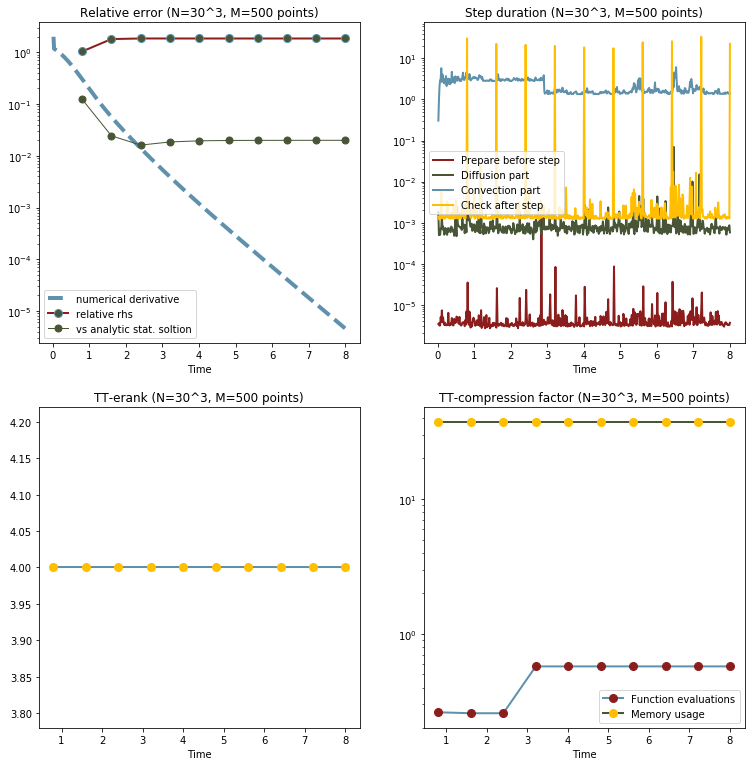

In [4]:
SL.plot()

In [ ]:
opts = { 'is_log': True, 'is_abs': False, 'is_err_abs': False, 'with_err_stat': True }
SL.plot_t([-3.]*d, opts)
SL.plot_t([+0.]*d, opts)
SL.plot_t([+3.]*d, opts)

In [ ]:
opts = { 'is_log': True, 'is_abs': False, 'is_err_abs': False, 'with_err_stat': True }
SL.plot_x(+0.1, opts)
SL.plot_x(+0.5, opts)
SL.plot_x(None, opts)

<div class="head1">
    <div class="head1__name">
        Results for multiple computations
    </div>
    <div class="head1__note">
        We use results that already saved to file (see file `multi_solve.ipynb`).
    </div>
</div>

In [ ]:
SLC = SolversCheck('./../computations/data/fpe_3d_oup')
SLC.load()

name1 = 'Solver-NP'
name2 = 'Solver-TT'

M = SLC.res[name2]['M']
N = SLC.res[name2]['N']

m = M[-1]
n = N[-1]

<div class="head2">
    <div class="head2__name">
        Dependence on the number of time points
    </div>
    <div class="head2__note">
        We present results for TT-solver of the 2th order.
    </div>
</div>

In [ ]:
SLC.plot(name2, n=n, is_stat=False, is_xpoi=False, lims={ 'all': [1, None] })

<div class="head2">
    <div class="head2__name">
        Dependence on the number of spatial points
    </div>
    <div class="head2__note">
        We present results for TT-solver of the 2th order.
    </div>
</div>

In [ ]:
SLC.plot(name2, m=m, is_stat=False, lims={ 'all': [1, 6] })

<div class="head2">
    <div class="head2__name">
        Dependence on the solver type
    </div>
    <div class="head2__note">
        We present results (dependencies on the number of time and spatial points) for NP-solver and TT-solver.
    </div>
</div>

In [ ]:
SLC.plot_all(n=n, is_stat=False)

In [ ]:
SLC.plot_all(m=m, is_stat=False)

<div class="head1">
    <div class="head1__name">
        DRAFT | Explicit (simple) solvers
    </div>
    <div class="head1__note">
        Only for example and tests.
    </div>
</div>

In [7]:
import time
import numpy as np
import scipy.sparse as sp
from scipy.integrate import solve_ivp
from scipy.linalg import expm as expm
import matplotlib.pyplot as plt

In [8]:
d = 3
m = t_poi
n = x_poi
l = (x_max - x_min) / (x_poi - 1)
h = (t_max - t_min) / (t_poi - 1)
T = np.linspace(t_min, t_max, t_poi)

In [10]:
def show_x(X, r_calc, _time):
    X = X.reshape(1, -1)
    r_init = func_r0(X)
    r_real = func_rt(X, t_max)
    r_stat = func_rs(X)
    e = np.linalg.norm(r_real - r_calc) / np.linalg.norm(r_real)

    plt.plot(
        X.reshape(-1), r_init, '--', label='Initial',
        linewidth=3, color='tab:blue'
    )
    plt.plot(
        X.reshape(-1), r_calc, label='Calculated',
        linewidth=1, color='tab:green', marker='o', markersize=7,
        markerfacecolor='lightgreen', markeredgecolor='g'
    )
    plt.plot(
        X.reshape(-1), r_real, label='Analytic',
        linewidth=3, color='black'
    )
    plt.plot(
        X.reshape(-1), r_stat, '--', label='Stationary',
        linewidth=2, color='magenta'
    )
    
    plt.title('Solution at the final time step')
    plt.xlabel('x')
    plt.ylabel('r')
    plt.legend(loc='best')
    plt.show()

    print('Number of spatial points : %8d'%x_poi)
    print('Number of time points    : %8d'%t_poi)
    print('Error (relative norm)    : %-12.2e'%e)
    print('Total time (sec)         : %-12.2e'%_time)

<div class="head2">
    <div class="head2__name">
        Euler solver and uniform spatial grid
    </div>
</div>

We can solve this 1D equation on the uniform spatial grid for the time $t > 0$ with step $h$ and uniform spatial grid with step $l$ using 2th order finite difference scheme

$$
    \frac{\partial \rho}{\partial t} = (D + \widehat{Q}) \rho,
$$
where
$$
    \widehat{Q} \rho = f Q \rho - \frac{\partial f}{\partial x} \rho,
$$

$$
    D = \frac{1}{l^2} tridiag \left( 1, -2, 1 \right),
    \quad
    Q = \frac{1}{2 l} tridiag \left( -1, 0, 1 \right).
$$

Let apply 1th order splitting method on the time step $(k+1)$
$$
    \frac{\partial v}{\partial t} = D v,
    \quad
    v_{k} = \rho_{k},
    \quad
    v_{k+1} = v = ?,
$$
$$
    \frac{\partial w}{\partial t} = \widehat{Q} w,
    \quad
    w_{k} = v,
    \quad
    w_{k+1} = \rho_{k+1} = ?,
$$
and solve both ODE by the 1th order Euler method.

In [14]:
_time = time.time()

X = np.linspace(x_min, x_max, x_poi).reshape(1, -1)
X = [X.copy() for _ in range(d)]
X = np.meshgrid(*X, indexing='ij')
X = np.array(X).reshape((d, -1), order='F')

I = np.eye(x_poi)

Q = sp.spdiags(
    [
        [-1.] * x_poi,
        [+1.] * x_poi
    ],
    [-1,  1], x_poi, x_poi
).tocsr().toarray()
Q = Q * (0.5 / l)
Q = np.kron(Q, np.kron(I, I)) + np.kron(I, np.kron(Q, I)) + np.kron(I, np.kron(I, Q))

D = sp.spdiags(
    [
        [+1.] * x_poi,
        [-2.] * x_poi,
        [+1.] * x_poi
    ],
    [-1, 0, 1], x_poi, x_poi
).tocsr().toarray()
D = D * D_coef / l / l
D = np.kron(D, np.kron(I, I)) + np.kron(I, np.kron(D, I)) + np.kron(I, np.kron(I, D))

r = func_r0(X)

print(x_poi)
print(x_poi**d)
print(D.shape)
print(Q.shape)
print(r.shape)

for t in T[1:]:
    F0 = np.diag(func_f0(X, t).reshape(-1))
    F1 = np.diag(func_f1(X, t).reshape(-1))
    w0 = r
    w1 = w0 + h * D @ w0
    # w1 = ZD @ w0
    v0 = w1
    v1 = v0 - h * F0 @ Q @ v0 - h * F1 @ v0
    r = v1
    
show_x(X, r.reshape(-1), time.time() - _time)

11
1331
(1331, 1331)
(1331, 1331)
(1331,)


ValueError: shapes (3993,3993) and (1331,1331) not aligned: 3993 (dim 1) != 1331 (dim 0)

In [ ]:
_time = time.time()



r = func_r0(X)
for t in T[1:]:
    r = r + h * D @ r

show_x(X, r, time.time() - _time)

<div class="head1">
    <div class="head1__name">
        Check stationary solution
    </div>
</div>

We calculate rhs (for the large value $\tau$ of time)
$$
    rhs(x)
    =
    \sum_{i=1}^d \sum_{j=1}^d
        \frac{\partial^2}{\partial x_i \partial x_j}
        \left[ D_{ij}(x, \tau) \rho_{stat}(x) \right]
    - \sum_{i=1}^d
        \frac{\partial}{\partial x_i}
        \left[ f_i(x, \tau) \rho_{stat}(x) \right],
$$
using Chebyshev grid and Chebyshev differential matrices ($D_1$, $D_2$)
$$
    \begin{split}
        rhs
        & =
        D_c (D_2 \otimes I \otimes \ldots \otimes I) \rho_{stat} +
        \ldots +
        D_c (I \otimes I \otimes \ldots \otimes D_2) \rho_{stat} -
        \\ & -
        (D_1 \otimes I \otimes \ldots \otimes I) ( f_1 \rho_{stat} ) -
        \ldots -
        (I \otimes I \otimes \ldots \otimes D_1) ( f_d \rho_{stat} ),
    \end{split}
$$
and check if it close to zero.

In [5]:
from intertrain import Intertrain

t_min, t_max, t_poi = +0., +5., 100
x_min, x_max, x_poi = -3., +3., 11

IT = Intertrain(n=[x_poi]*3, l=[[-3., 3.], [-3., 3.], [-3., 3.]], with_tt=False)
IT.init(func_rs)

I0 = np.eye(x_poi)
J0 = np.eye(x_poi); J0[0, 0] = 0.; J0[-1, -1] = 0.
D1 = IT.dif1()
D2 = IT.dif2()

t = 100.
x = IT.grid()
f = func_f0(x, t)
r = IT.Y.reshape(-1, order='F')

rhs = D_coef * np.kron(D2, np.kron(I0, I0)) @ r
rhs+= D_coef * np.kron(I0, np.kron(D2, I0)) @ r
rhs+= D_coef * np.kron(I0, np.kron(I0, D2)) @ r
rhs-= np.kron(D1, np.kron(I0, I0)) @ (f[0, :] * r)
rhs-= np.kron(D1, np.kron(D1, I0)) @ (f[1, :] * r)
rhs-= np.kron(I0, np.kron(I0, D1)) @ (f[2, :] * r)
rhs = np.kron(J0, np.kron(J0, J0)) @ rhs

print('Norm of rho : %-8.2e'%(np.linalg.norm(r) / (x_max - x_min)**d))
print('Norm of rhs : %-8.2e'%(np.linalg.norm(rhs) / (x_max - x_min)**d))

Norm of rho : 1.32e-03
Norm of rhs : 3.15e-03


<div class="end"></div>